
🔍 Training LogisticRegression with GridSearchCV...
✅ Best Params for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
✅ Accuracy: 1.0000

Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
 [[ 9  0]
 [ 0 23]]

🔍 Training RandomForest with GridSearchCV...
✅ Best Params for RandomForest: {'max_depth': 3, 'n_estimators': 100}
✅ Accuracy: 1.0000

Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00      

C:\Users\Priyan\anaconda3\envs\aiml\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:41:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Priyan\AppData\Local\Temp\ipykernel_9296\458369279.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


✅ Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
✅ Accuracy: 1.0000

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
 [[ 9  0]
 [ 0 23]]

🔍 Training NaiveBayes with GridSearchCV...
✅ Best Params for NaiveBayes: {}
✅ Accuracy: 1.0000

Classification Report for NaiveBayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
 [[ 9  0]
 

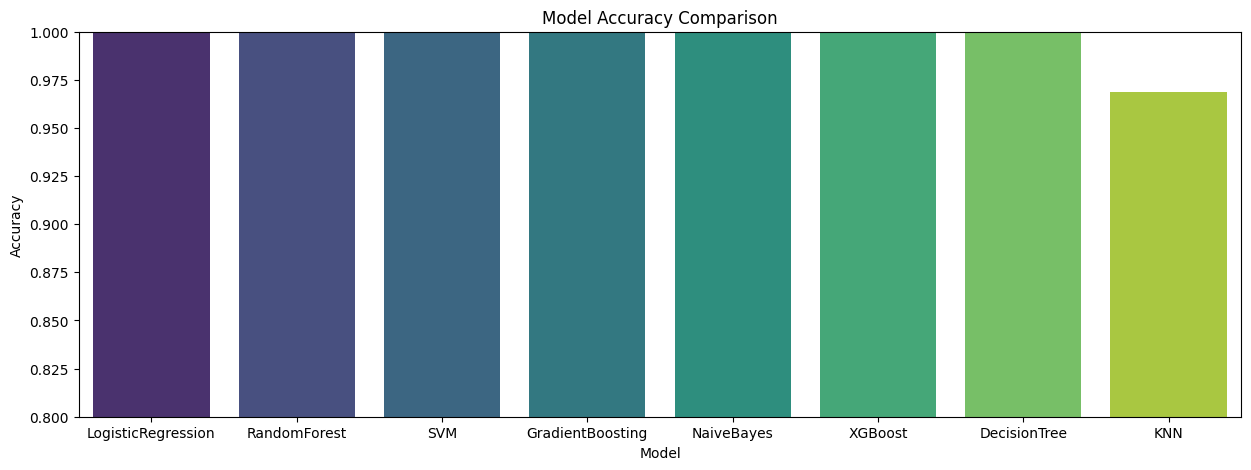

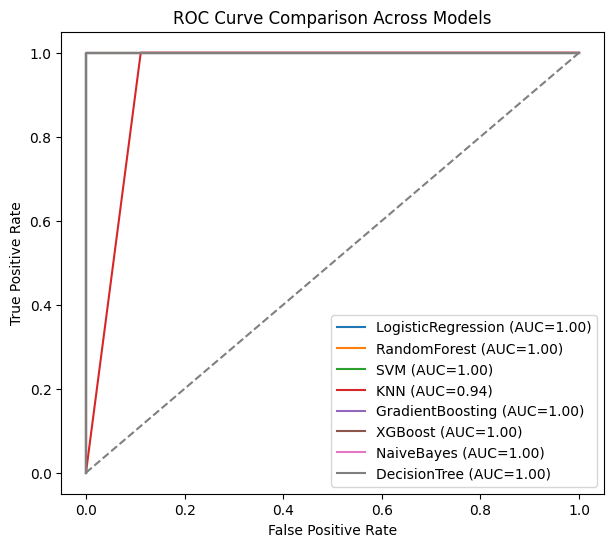


🏆 Best Performing Model: LogisticRegression


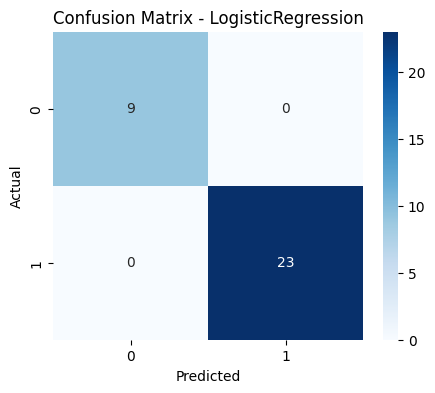

In [7]:
# ---------------------------------------------------------------
# Chronic Kidney Disease (CKD) Classification with GridSearchCV & Graphs
# ---------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, auc)

# Step 1: Load the dataset
df = pd.read_csv("kidney_disease.csv")

# Step 2: Basic cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 4: Features and target
X = df.drop("classification", axis=1)
y = df["classification"]

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------------------
# MODEL TRAINING + GRIDSEARCHCV
# ---------------------------------------------------------------

# Model dictionary
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }),
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7]
    }),
    "SVM": (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
     "GradientBoosting":(
    GradientBoostingClassifier(),
    {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
     "XGBoost":(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
     "NaiveBayes":(
    GaussianNB(),
    {}  # No hyperparameters to tune for GaussianNB
    ),
     "DecisionTree":(
    DecisionTreeClassifier(),
    {
        'max_depth': [3, 5, 7, None],
        'criterion': ['gini', 'entropy']
    })
    }

results = []
roc_curves = {}

# Loop through each model and perform GridSearchCV
for name, (model, params) in models.items():
    print(f"\n🔍 Training {name} with GridSearchCV...")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    results.append({"Model": name, "Accuracy": acc, "AUC": roc_auc})
    roc_curves[name] = (fpr, tpr, roc_auc)
    
    print(f"✅ Best Params for {name}: {grid.best_params_}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------------------------------------------
# 📊 VISUALIZATIONS
# ---------------------------------------------------------------

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📈 Model Comparison:\n", results_df)

# 1️⃣ Accuracy Comparison Bar Chart
plt.figure(figsize=(15,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.show()

# 2️⃣ ROC Curve Comparison
plt.figure(figsize=(7,6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend()
plt.show()

# 3️⃣ Confusion Matrix for the Best Model
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Performing Model: {best_model_name}")

best_model = models[best_model_name][0]
grid = GridSearchCV(best_model, models[best_model_name][1], cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
best_final = grid.best_estimator_
y_pred_final = best_final.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()